In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm
# %matplotlib inline
from datetime import timedelta,datetime
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, log_loss
import json
import pyodbc 
import sys  
import datetime
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

Чтение данных из архива потребления

In [2]:
GTP = 'PSIBUE11'
Xday =1

In [3]:
try:
    if len(str(sys.argv[1:][0]))>6:
        GTP = str(sys.argv[1:][0])
        Xday = int(sys.argv[2:][0])
except:
    print('JN')

In [4]:
print('-----------------------',GTP,Xday)

----------------------- PSIBUE11 1


In [5]:
server = 
database = 
username = 
password = 
    
weather = pd.read_excel('/home/playground/Potreb/Data/Weather.xlsx',header=[0,1], engine='openpyxl')

gtp_dict = {'PSIBUEN1': 'ГТП2', 'PSIBUEN4': 'ГТП4', 'PSIBUEN6': 'ГТП7', 'PSIBUEN7': 'ГТП7', 'PSIBUE12': 'ГТП12', 'PSIBUE13': 'ГТП13',
            'PSIBUENK': 'ГТП_K', 'PSIBUE16': 'ГТП16', 'PSIBUEN2': 'ГТП2', 'PSIBUE11': 'ГТП12', 'PSIBUE20': 'ГТП20', 'PSIBUE22': 'ГТП22',
            'PSIBUE18': 'ГТП_K','PSIBUE39': 'ГТП_K','PSIBUE46': 'ГТП46'}
    
#dataT=str(datetime.date.today())

conn = pyodbc.connect('DRIVER={FreeTDS};SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password+';TDS_VERSION=8.0;')
cursor = conn.cursor()  
qerty='SELECT * \
        FROM ComDis.AiiskueSelfConsWithUndercount WHERE Name=\''+GTP+'\' ORDER BY Date ASC'

rez = pd.read_sql(qerty,conn)
rez['datetime'] = pd.to_datetime(rez['Date'])

rez.set_index('datetime',append=False,drop=True,inplace=True)
#rez['datehour']=(rez.index-timedelta(minutes=15)).round('H')
rez['datehour']=rez.index
rez = rez.groupby('datehour').sum()
rez.drop(['GtpId'],axis=1,inplace=True)
rez.columns = [''+str(GTP)+'']
while str(rez.index[-1])[11:-6] != '23':
    rez.drop(rez.tail(1).index,inplace=True)

trivial_ = rez.iloc[-48:]
# rez.tail(48)


In [6]:

tomorrow = (datetime.today() +timedelta(days = Xday)).strftime("%Y-%m-%d") 
# create an array of 5 dates starting at '2015-02-24', one per minute
rng = pd.date_range(start=tomorrow, periods=48, freq='30Min')
df = pd.DataFrame({ 'datehour': rng }) 
df.set_index('datehour',append=False,drop=True,inplace=True)
rez=pd.concat([rez,df])
rez.tail(50)

,PSIBUE11
datehour,
2022-02-11 23:00:00,9.063
2022-02-11 23:30:00,8.933
2022-02-13 00:00:00,NaN
2022-02-13 00:30:00,NaN
2022-02-13 01:00:00,NaN
2022-02-13 01:30:00,NaN
2022-02-13 02:00:00,NaN
2022-02-13 02:30:00,NaN
2022-02-13 03:00:00,NaN


In [7]:
wdc = pd.read_csv('/home/playground/Potreb//Data/WorkDaysCalendar.csv',index_col=0)
wdc.index = pd.to_datetime(wdc.index)
rez = rez.join(wdc)
rez.Type.fillna(method='pad',inplace=True)
rez['DoY'] = rez.index.dayofyear
rez['DoW'] = rez.index.dayofweek
rez['Hour'] = rez.index.hour
rez['Hour/2'] =((rez.index-timedelta(minutes=15)).round('H').hour)*2+(rez.index.minute/30)+1
rez['Day'] = rez.index.day
rez['DiM'] = rez.index.day/rez.index.days_in_month

wdf = weather[['Unnamed: 0_level_0',gtp_dict[GTP]]]
wdf.columns = wdf.columns.droplevel()
wdf.dropna(inplace=True)
wdf['datetime'] = pd.to_datetime(wdf.date)
ldf = rez[[GTP,'Type','DoY','DoW','Hour','Hour/2','Day','DiM']]
data = ldf.join(wdf.set_index('datetime',append=False,drop=True))
data.drop('date',axis=1,inplace=True)
data = data.iloc[:,:12]
data.columns = ['Load','Type','DoY','DoW','Hour','Hour/2','Day','DiM','Temp','H','fi','V']
data.interpolate(inplace=True)
data.index.names = ['datehour']
data = data[data.index>='2021-12-01']
data.tail(50)

,Load,Type,DoY,DoW,Hour,Hour/2,Day,DiM,Temp,H,fi,V
datehour,,,,,,,,,,,,
2022-02-11 23:00:00,9.063,Рабочий,42,4,23,47.0,11,0.392857,-22.936458,773.234375,96.645833,2.569062
2022-02-11 23:30:00,8.933,Рабочий,42,4,23,48.0,11,0.392857,-22.800729,773.054688,96.572917,2.580781
2022-02-13 00:00:00,8.933,Выходной,44,6,0,1.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500
2022-02-13 00:30:00,8.933,Выходной,44,6,0,2.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500
2022-02-13 01:00:00,8.933,Выходной,44,6,1,3.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500
2022-02-13 01:30:00,8.933,Выходной,44,6,1,4.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500
2022-02-13 02:00:00,8.933,Выходной,44,6,2,5.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500
2022-02-13 02:30:00,8.933,Выходной,44,6,2,6.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500
2022-02-13 03:00:00,8.933,Выходной,44,6,3,7.0,13,0.464286,-22.665000,772.875000,96.500000,2.592500


In [8]:
prog = pd.read_excel('/mnt/diskz/АСТЭП/for_python/psibue11.xlsx',sheet_name='Лист2', engine='openpyxl')
prog.drop(['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)
prog.columns = ['plan','datehour']
prog=prog.set_index('datehour',append=False,drop=True)
prog.index = pd.to_datetime(prog.index)

# prog.tail(50)

In [9]:

prog=prog.shift(-4, axis = 0)
data = data.join(prog)
data=data.fillna(dict.fromkeys(data.columns.tolist(),data.plan.ffill()))
data = data.replace({'plan':{0:'с'}})
data.tail(48)


,Load,Type,DoY,DoW,Hour,Hour/2,Day,DiM,Temp,H,fi,V,plan
datehour,,,,,,,,,,,,,
2022-02-13 00:00:00,8.933,Выходной,44,6,0,1.0,13,0.464286,-22.665,772.875,96.5,2.5925,д
2022-02-13 00:30:00,8.933,Выходной,44,6,0,2.0,13,0.464286,-22.665,772.875,96.5,2.5925,д
2022-02-13 01:00:00,8.933,Выходной,44,6,1,3.0,13,0.464286,-22.665,772.875,96.5,2.5925,д
2022-02-13 01:30:00,8.933,Выходной,44,6,1,4.0,13,0.464286,-22.665,772.875,96.5,2.5925,д
2022-02-13 02:00:00,8.933,Выходной,44,6,2,5.0,13,0.464286,-22.665,772.875,96.5,2.5925,к
2022-02-13 02:30:00,8.933,Выходной,44,6,2,6.0,13,0.464286,-22.665,772.875,96.5,2.5925,к
2022-02-13 03:00:00,8.933,Выходной,44,6,3,7.0,13,0.464286,-22.665,772.875,96.5,2.5925,к
2022-02-13 03:30:00,8.933,Выходной,44,6,3,8.0,13,0.464286,-22.665,772.875,96.5,2.5925,к
2022-02-13 04:00:00,8.933,Выходной,44,6,4,9.0,13,0.464286,-22.665,772.875,96.5,2.5925,с


In [10]:
# data.Load.plot()

Вычисляю фичу - потребление два дня назад - тривиальный прогноз "завтра будет как вчера"

In [11]:
#  Добавим 2-ую фичу
# потребление и план будет завтра как вчера. 
trivial = np.concatenate([data.Load.iloc[:48],data.Load.iloc[:-48]])
triv_plan = np.concatenate([data.plan.iloc[:48],data.plan.iloc[:-48]])

Считаю вторую тривиальную фичу - потребление будет как неделю назад. Если типы дней расходятся из-за праздников, то берется ближайший дальше того же типа

In [13]:
#  Добавим 1-ую фичу
# потребление и план будет как неделю назад. Если типы дней расходятся из-за праздников, то берется ближайший дальше того же типа 
from tqdm import tnrange,tqdm
cal_pred = np.concatenate([data.Load.iloc[:48*7],data.Load.mean()*np.ones(data.shape[0]-48*7)])
cal_plan = np.concatenate([data.plan.iloc[:48*7],data.plan.iloc[:-48*7]])
for i in tnrange(48*7,data.shape[0]):
    if data.Type.iloc[i] == data.Type.iloc[i-48*7]:
        cal_pred[i] = data.Load.iloc[i-48*7]
        cal_plan[i] = data.plan.iloc[i-48*7]
    else:
        try:
            prev_same = max(data.index[(data.Type == data.Type.iloc[i])
                                      &(data.DoW == data.DoW.iloc[i])]&(data.index<i))
            cal_pred[i] = data.Load.iloc[prev_same]
            cal_plan[i] = data.plan.iloc[prev_same]
        except:
            cal_pred[i] = data.Load.iloc[i-48*7]
            cal_plan[i] = data.plan.iloc[i-48*7]

  0%|          | 0/3216 [00:00<?, ?it/s]

Добавляю тривиальные фичи в набор данных

In [18]:
# Добавим эти фичи к общему датасету
data['cal_pred'] = cal_pred
data['cal_plan'] = cal_plan 

data['trivial'] = trivial
data['triv_plan'] = triv_plan

In [20]:
data['plan']

datehour
2021-12-01 00:00:00    с
2021-12-01 00:30:00    с
2021-12-01 01:00:00    с
2021-12-01 01:30:00    с
2021-12-01 02:00:00    с
                      ..
2022-02-13 21:30:00    д
2022-02-13 22:00:00    д
2022-02-13 22:30:00    д
2022-02-13 23:00:00    д
2022-02-13 23:30:00    д
Name: plan, Length: 3552, dtype: object

In [21]:
data.columns

Index(['Load', 'Type', 'DoY', 'DoW', 'Hour', 'Hour/2', 'Day', 'DiM', 'Temp',
       'H', 'fi', 'V', 'plan', 'cal_pred', 'cal_plan', 'trivial', 'triv_plan'],
      dtype='object')

Теперь запускаю Catboost с данными: час, день недели, день года, погодные фичи и тривиальные фичи: вчера, неделю назад и регрессия по температуре

In [23]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model = model.load_model('/home/playground/Potreb/Models/'+GTP+'_new.c5')

In [24]:
data['cat_pred'] = model.predict(data[model.feature_names_])

In [25]:
data['cat_pred'].index=data['cat_pred'].index.shift(periods=0,freq='D')
pred=data['cat_pred'][-48:]
# pred

<AxesSubplot:xlabel='datehour'>

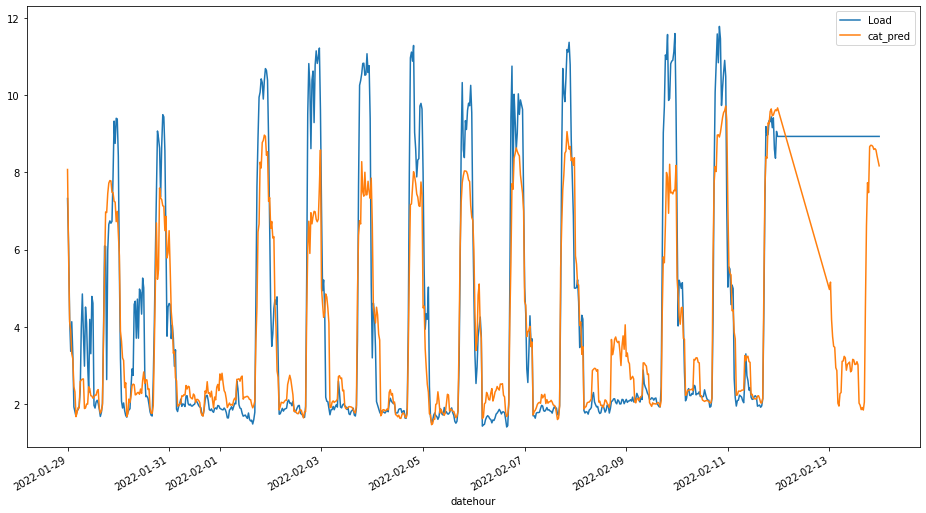

In [26]:
data[['Load','cat_pred']][-48*15:].plot(figsize=(16,9))

In [27]:
import pyodbc 
import pandas as pd
server = r'***'
database = r'***'
username = r'***'
password = r'***' 

conn = pyodbc.connect('DRIVER={FreeTDS};SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password+';TDS_VERSION=8.0;')

In [28]:

for i in pred.index:
#     print(i,pred.loc[i])
    cursor = conn.cursor()
#     query = "INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('"+GTP+"', '"+str(i)+"','test1_"+str(Xday)+"',"+str(pred.loc[i])+"  ) "
    query = "BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '"+str(i)+"' and GTP = '"+GTP+"'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('"+GTP+"', '"+str(i)+"','candidate"+str(Xday)+"',"+str(pred.loc[i])+"  )  COMMIT"
    print(query)
    cursor.execute(query)
    conn.commit()

    cursor.execute(query)
    conn.commit()

BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 00:00:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('PSIBUE11', '2022-02-13 00:00:00','candidate1',4.966805937174481  )  COMMIT
BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 00:30:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('PSIBUE11', '2022-02-13 00:30:00','candidate1',5.158327165561639  )  COMMIT
BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 01:00:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('PSIBUE11', '2022-02-13 01:00:00','candidate1',4.192490067718957  )  COMMIT
BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 01:30:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionFo

BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 14:30:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('PSIBUE11', '2022-02-13 14:30:00','candidate1',1.968802437378038  )  COMMIT
BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 15:00:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('PSIBUE11', '2022-02-13 15:00:00','candidate1',1.8548858321950448  )  COMMIT
BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 15:30:00' and GTP = 'PSIBUE11'  INSERT Otrsv_ConsumptionForecast (GTP , Date_Forecast , Model_Name, Value   ) VALUES ('PSIBUE11', '2022-02-13 15:30:00','candidate1',1.9088875555148563  )  COMMIT
BEGIN TRANSACTION DELETE FROM Otrsv_ConsumptionForecast WHERE Date_Forecast = '2022-02-13 16:00:00' and GTP = 'PSIBUE11'  INSERT Otrsv_Consumption